In [227]:
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [228]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [229]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

74.20382165605095
18.890814558058924


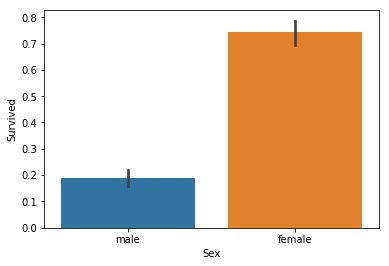

In [231]:
sns.barplot(x='Sex',y='Survived',data=train)

print(train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print(train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

In [232]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [233]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

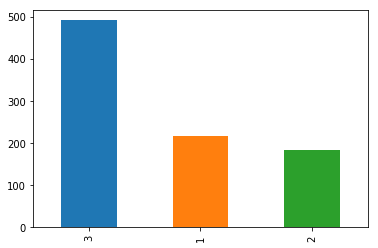

In [235]:
train['Pclass'].value_counts().plot.bar()


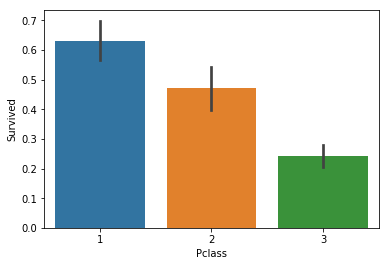

In [236]:
sns.barplot(x='Pclass',y='Survived',data=train)

In [237]:
train['Age']=train.Age.fillna(-0.5)
test['Age']=test.Age.fillna(-0.5)

In [238]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Student','College',' Adult','Senior Adult','Senior']

train['Agegroup']=pd.cut(train['Age'],bins,labels=labels)
test['Agegroup']=pd.cut(test['Age'],bins,labels=labels)

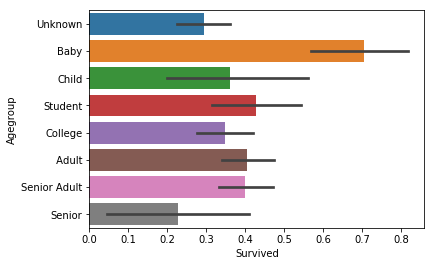

In [239]:
sns.barplot(x='Survived',y='Agegroup',data=train)

In [240]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [241]:
combine=[train,test]

In [242]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
  
   

In [243]:
pd.crosstab(train['Title'],train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [244]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major',
                                              'Rev','Jonkheer','Dona'],'Rare')
    
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

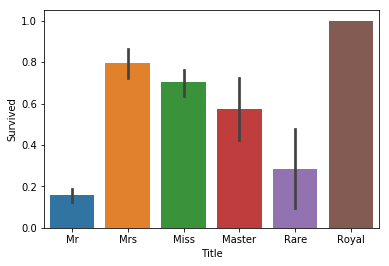

In [245]:
sns.barplot(x='Title',y='Survived',data=train)

In [246]:
title_mapping = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Rare": 5, "Royal": 6}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    


In [247]:
train.Title.value_counts()

1    517
3    185
2    126
4     40
5     21
6      2
Name: Title, dtype: int64

In [248]:
mr_age = train[train["Title"] == 1]["Agegroup"].mode() #Young Adult
miss_age = train[train["Title"] == 3]["Agegroup"].mode() #Student
mrs_age = train[train["Title"] == 2]["Agegroup"].mode() #Adult
master_age = train[train["Title"] == 4]["Agegroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["Agegroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["Agegroup"].mode() #Adult

In [249]:
print(mr_age)

0     Adult
Name: Agegroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Student < College < Adult < Senior Adult < Senior]


In [250]:
train.Title.value_counts()

1    517
3    185
2    126
4     40
5     21
6      2
Name: Title, dtype: int64

In [251]:
train.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S,Senior Adult,2
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,Senior Adult,3
557,558,0,1,"Robbins, Mr. Victor",male,-0.5,0,0,PC 17757,227.5250,NaN,C,Unknown,1
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,Senior Adult,1
792,793,0,3,"Sage, Miss. Stella Anna",female,-0.5,8,2,CA. 2343,69.5500,NaN,S,Unknown,3
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Adult,2
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q,Adult,3
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S,Senior Adult,3
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,Senior Adult,1
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S,Adult,1


In [252]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [253]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=True)

Embarked      2
Cabin       687
dtype: int64

In [254]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [255]:
train=train.fillna({"Embarked":"S"})

In [256]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [257]:
sex_mapping={"male":0,"female":1}

train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=train['Sex'].map(sex_mapping)

In [258]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [259]:
embarked_mapping={"S":0,"C":1,"Q":2}

train['Embarked']=train['Embarked'].map(embarked_mapping)
test['Embarked']=train['Embarked'].map(embarked_mapping)

In [260]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adult,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adult,1


In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [262]:
features=['PassengerId','Survived','Pclass','Sex','Parch','Embarked','Title','Fare']

In [263]:
y=train['Survived'].copy()
X=train[features].copy()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [264]:
df_train=x_train
df_train.head()

,PassengerId,Survived,Pclass,Sex,Parch,Embarked,Title,Fare
331,332,0,1,0,0,0,1,28.5000
733,734,0,2,0,0,0,1,13.0000
382,383,0,3,0,0,0,1,7.9250
704,705,0,3,0,0,0,1,7.8542
813,814,0,3,1,2,0,3,31.2750


In [265]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [266]:
df_test=x_test
df_test.head()

,PassengerId,Survived,Pclass,Sex,Parch,Embarked,Title,Fare
709,710,1,3,0,1,1,4,15.2458
439,440,0,2,0,0,0,1,10.5000
840,841,0,3,0,0,0,1,7.9250
720,721,1,2,1,1,0,3,33.0000
39,40,1,3,1,0,1,3,11.2417


In [267]:
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing,svm,neighbors
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output

In [268]:
from sklearn import tree
clfs = {
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}

In [269]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,GaussianNB,1.000000,1.000000,1.000000,1.000000
1,RandomForest,1.000000,0.986486,0.993197,0.994413
2,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
3,SVM,0.750000,0.040541,0.076923,0.597765
4,KNeighborsClassifier,0.680851,0.432432,0.528926,0.681564
5,GradientBoosting,1.000000,1.000000,1.000000,1.000000
